### IMPORTING MODULES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#### READING DATASET

In [5]:
df=pd.read_csv('/content/medical_insurance.csv')

In [6]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]

## SHAPE OF DATASET

In [7]:
df.shape

(2772, 7)

## COLUMN OF THE DATASET

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

##FIND THE NULL VALUES IS PRESENTING OR NOT

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## IND THE NaN VALUES IS PRESENTING OR NOT

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## FIND THE DUPLICATED VALUES

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [14]:
df.head(5).T

0          1          2            3          4
age              19         18         28           33         32
sex          female       male       male         male       male
bmi            27.9      33.77       33.0       22.705      28.88
children          0          1          3            0          0
smoker          yes         no         no           no         no
region    southwest  southeast  southeast    northwest  northwest
charges   16884.924  1725.5523   4449.462  21984.47061  3866.8552

In [15]:
df.tail(10).T

2762       2763        2764        2765       2766  \
age                21         51          22          47         18   
sex            female       male      female        male       male   
bmi             32.68       37.0       31.02       36.08      23.32   
children            2          0           3           1          1   
smoker             no         no         yes         yes         no   
region      northwest  southwest   southeast   southeast  southeast   
charges   26018.95052   8798.593  35595.5898  42211.1382  1711.0268   

               2767       2768        2769         2770       2771  
age              47         21          19           23         54  
sex          female     female        male         male       male  
bmi           45.32       34.6       26.03       18.715       31.6  
children          1          0           1            0          0  
smoker           no         no         yes           no         no  
region    southeast  southwest   northwest    northwest  southwest  
charges   8569.8618   2020.177  16450.8947  21595.38229   9850.432

In [13]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


## SEPARATE THE NUMERICAL COLUMN AND CATEGORICAL COLUMN

In [33]:
all_columns=df
numerical_columns=['age','bmi','children','charges']
categorical_columns=[x for x in all_columns if x not in numerical_columns]
print('\nNumerical columns')
print(numerical_columns)
print('\nCategorical columns')
print(categorical_columns)


Numerical columns
['age', 'bmi', 'children', 'charges']

Categorical columns
['sex', 'smoker', 'region']


In [34]:
df.isnull().apply(lambda x : [ sum(x), (sum(x) * 100) / df.shape[0]] )

age  sex  bmi  children  smoker  region  charges
0  0.0  0.0  0.0       0.0     0.0     0.0      0.0
1  0.0  0.0  0.0       0.0     0.0     0.0      0.0

In [35]:
df.describe().T

count          mean           std        min       25%         50%  \
age       2772.0     39.109668     14.081459    18.0000    26.000    39.00000   
bmi       2772.0     30.701349      6.129449    15.9600    26.220    30.44750   
children  2772.0      1.101732      1.214806     0.0000     0.000     1.00000   
charges   2772.0  13261.369959  12151.768945  1121.8739  4687.797  9333.01435   

                 75%          max  
age          51.0000     64.00000  
bmi          34.7700     53.13000  
children      2.0000      5.00000  
charges   16577.7795  63770.42801

## FIND THE KURTOSIS, SKEWNESS IN THE DATASET

In [36]:
from scipy.stats import kurtosis,skew,stats

In [37]:
print("Summary Statistics of Medical Costs")
print(df['charges'].describe())
print("skew:  {}".format(skew(df['charges'])))
print("kurtosis:  {}".format(kurtosis(df['charges'])))
print("missing charges values: {}".format(df['charges'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     2772.000000
mean     13261.369959
std      12151.768945
min       1121.873900
25%       4687.797000
50%       9333.014350
75%      16577.779500
max      63770.428010
Name: charges, dtype: float64
skew:  1.5104971094731552
kurtosis:  1.5611726113362723
missing charges values: 0
missing smoker values: 0


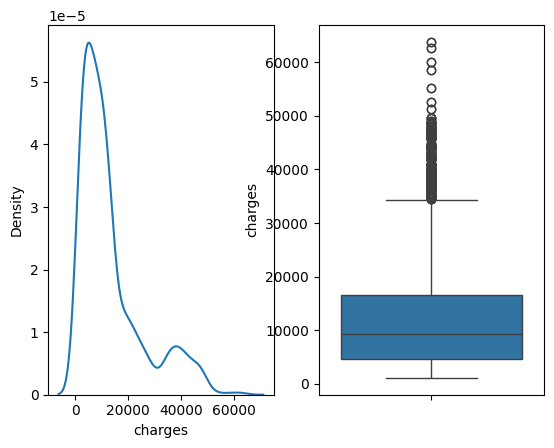

In [38]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['charges'], ax=axes[0])
sns.boxplot(df['charges'], ax=axes[1])
plt.show()



In [41]:
#insur_corr=df.corr('numerical_columns')
#insur_corr

In [ ]:
#insur_cov=df.cov('numerical_columns')
#insur_cov

## OUTLIER FINDING

<ipython-input-23-297e3112b283>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")


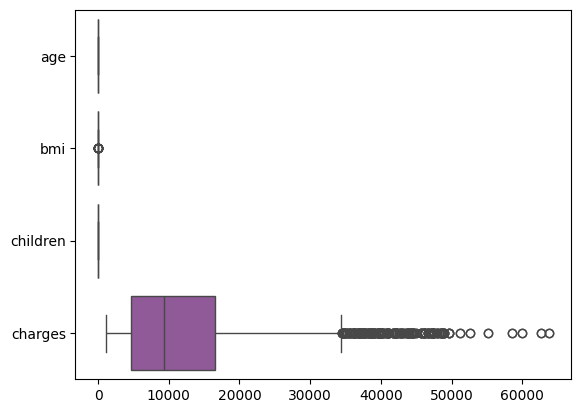

In [23]:
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [24]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [42]:
x=df[numerical_columns]
outlier_detect(x)


 Outliers for Column :  age  Outliers count  0
[]

 Outliers for Column :  bmi  Outliers count  14
[49.06, 48.07, 50.38, 47.6, 52.58, 47.74, 53.13, 49.06, 48.07, 50.38, 47.6, 52.58, 47.74, 53.13]

 Outliers for Column :  children  Outliers count  0
[]

 Outliers for Column :  charges  Outliers count  296
[39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 3998

In [44]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [45]:
df.smoker.value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [46]:
df.rename(columns={'sex': 'gender'}, inplace=True, level=None)

In [47]:
df.gender.value_counts()

gender
male      1406
female    1366
Name: count, dtype: int64

In [48]:
df.duplicated().sum()

1435

In [49]:
df = df.drop_duplicates()

In [50]:
df.duplicated().sum()

0

<Axes: ylabel='Frequency'>

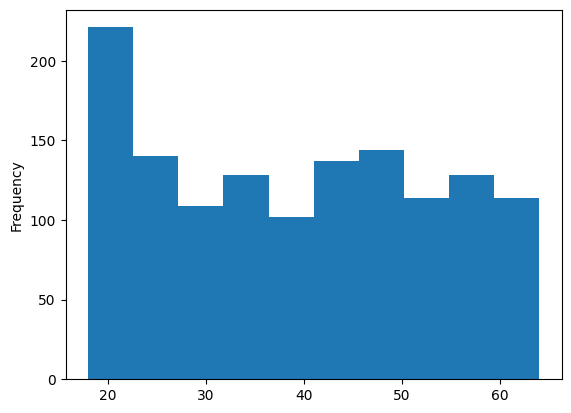

In [51]:
df.age.plot(kind="hist")

In [52]:
df.smoker.count()

1337

<ipython-input-53-f14652a2f456>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="smoker",data=df,palette='hls')


Text(0, 0.5, 'count')

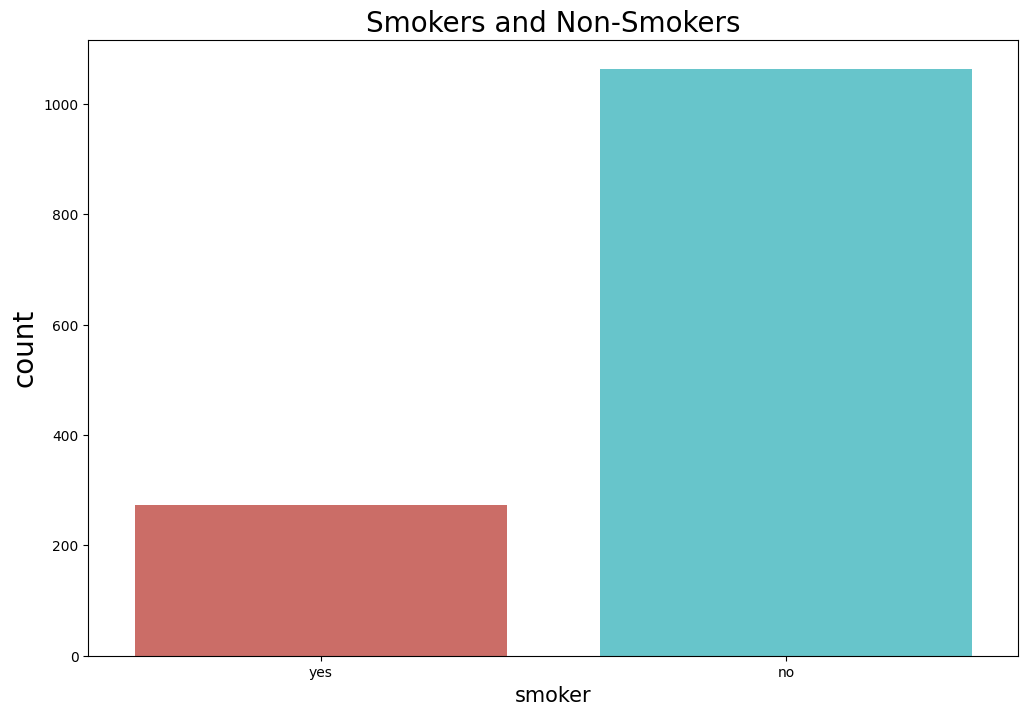

In [53]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

<ipython-input-54-89f074200d39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="age",data=df,palette='hls')


Text(0, 0.5, 'count')

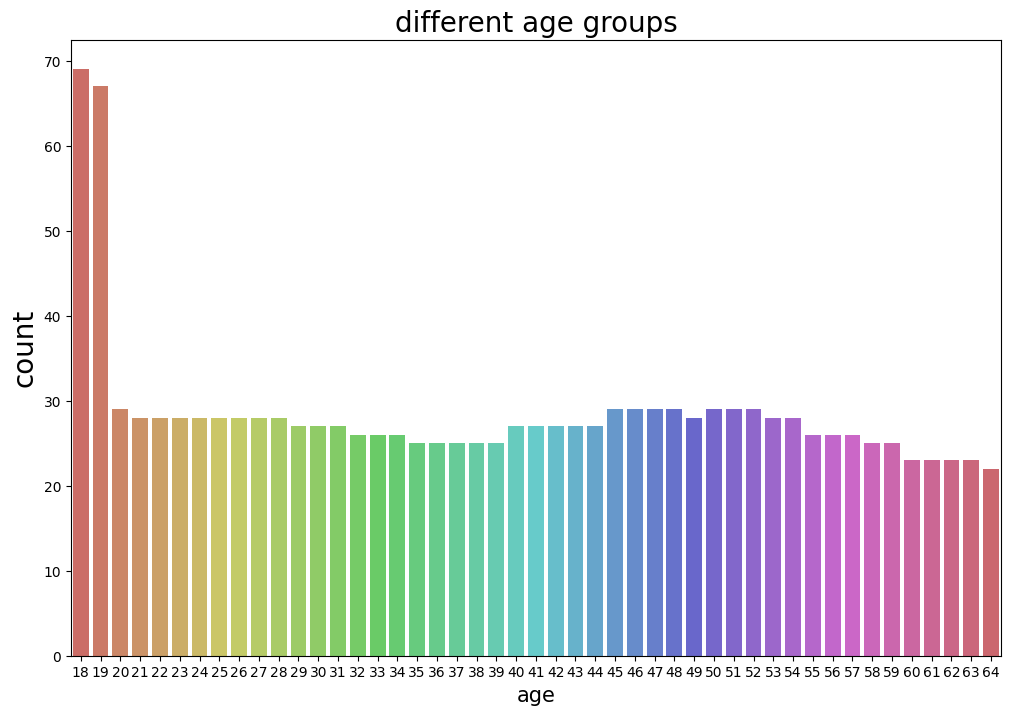

In [54]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=df,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

<ipython-input-55-7c5d2c63fc10>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df["bmi"])


Text(0.5, 1.0, 'Frequency Distribuition- bmi')

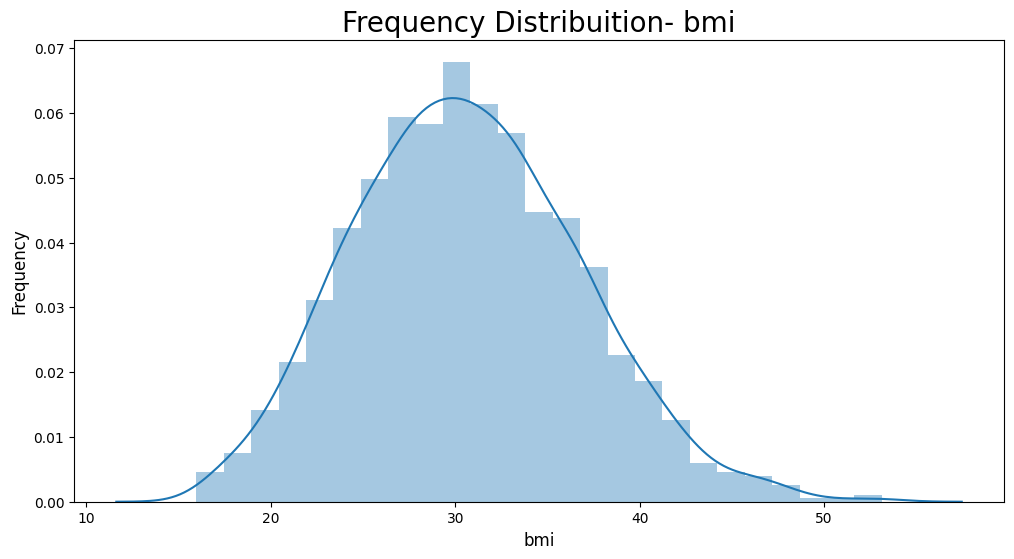

In [55]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["bmi"])
g.set_xlabel("bmi", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- bmi", fontsize=20)

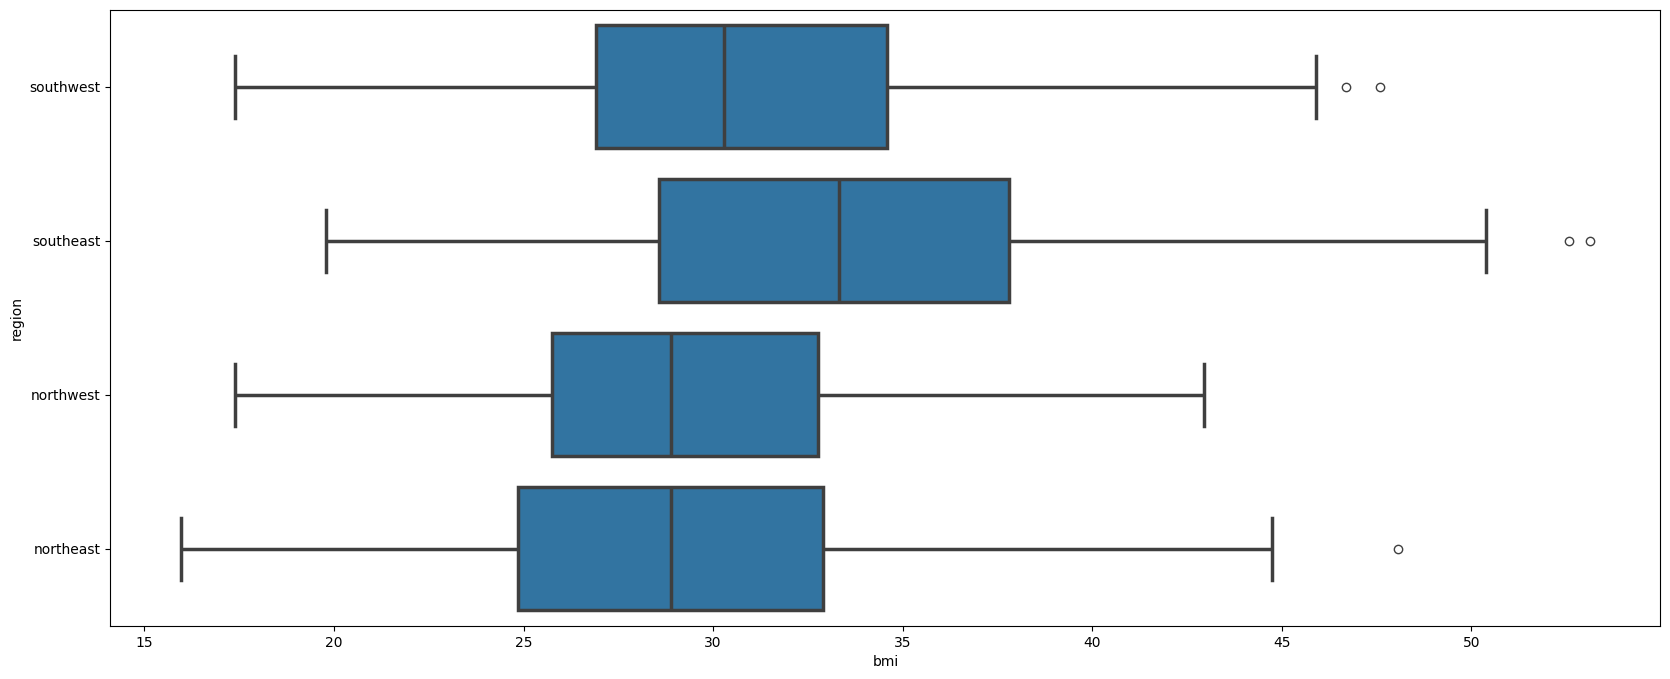

In [56]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="bmi" ,y="region", data=df, linewidth=2.5)
plt.show()

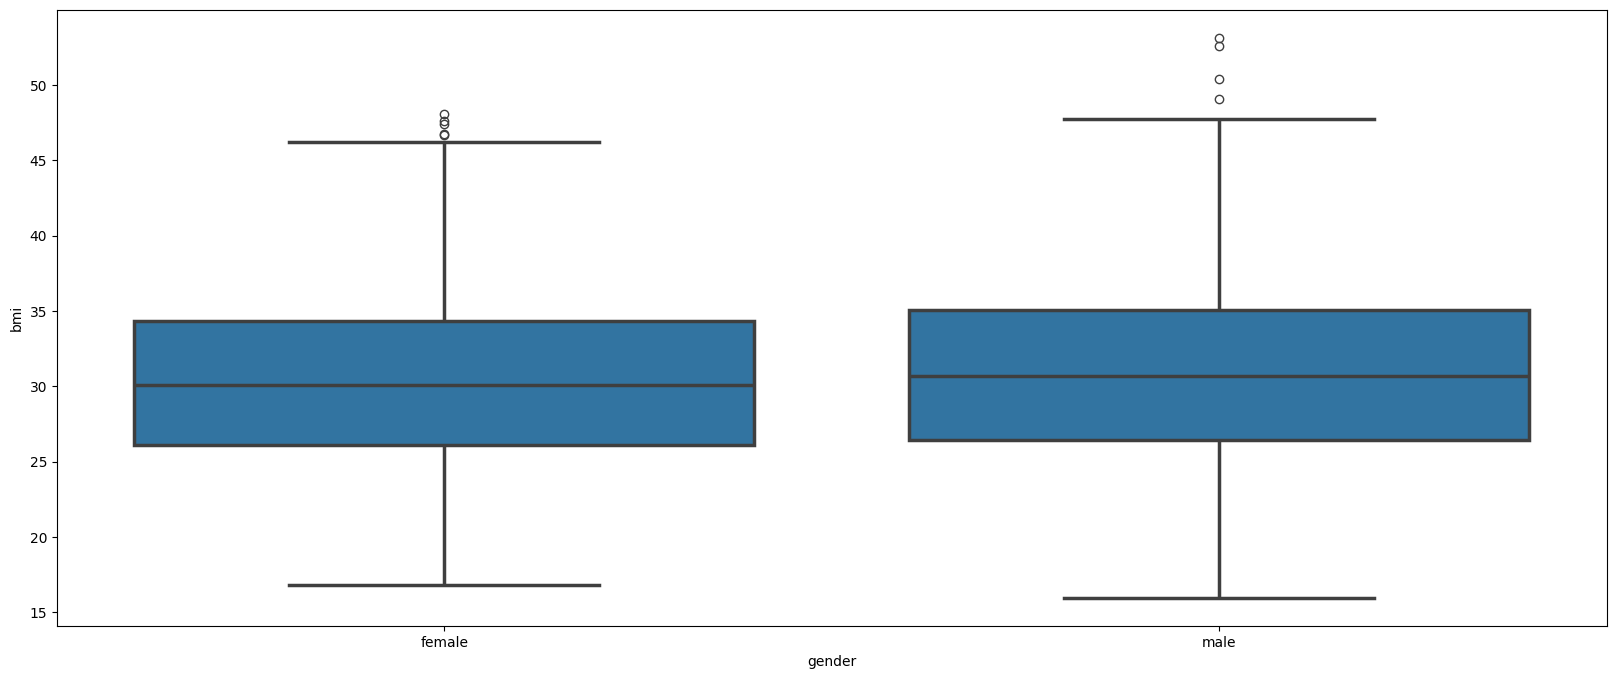

In [57]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="gender" ,y="bmi", data=df, linewidth=2.5)
plt.show()

<Axes: ylabel='Frequency'>

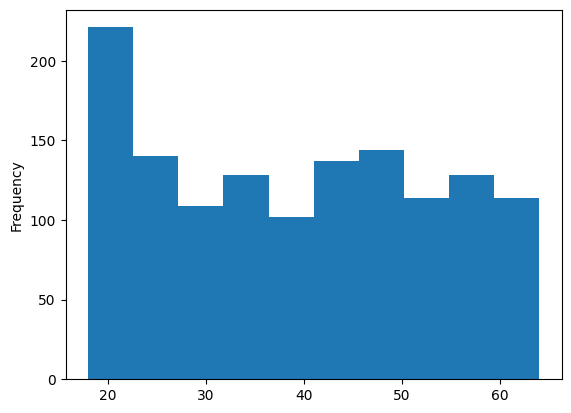

In [58]:
df.age.plot(kind="hist")

<Axes: ylabel='Frequency'>

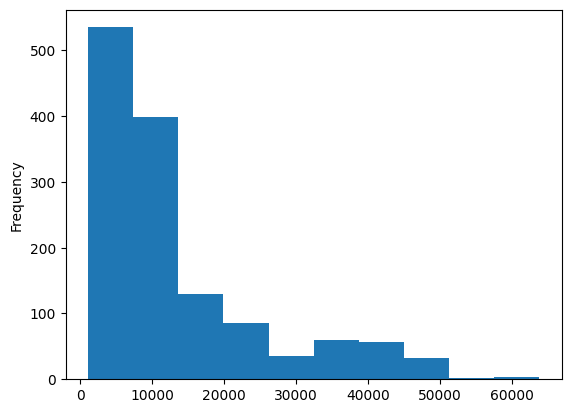

In [60]:
df.charges.plot(kind="hist")

<Axes: ylabel='Frequency'>

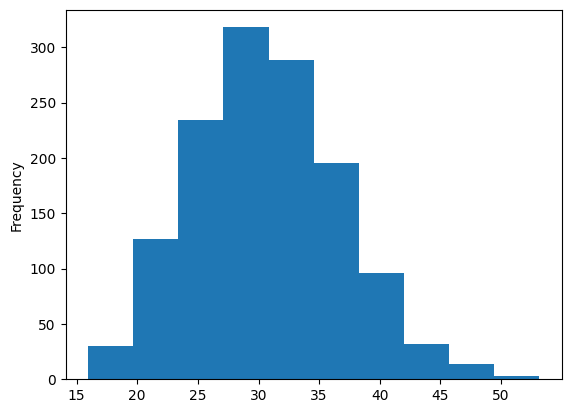

In [61]:
df.bmi.plot(kind="hist")

<Axes: ylabel='Frequency'>

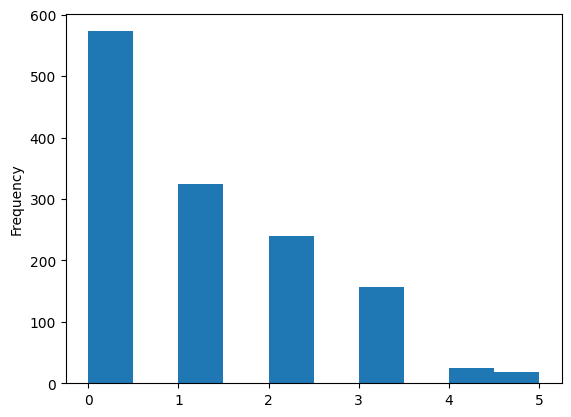

In [62]:
df.children.plot(kind="hist")

<Axes: ylabel='count'>

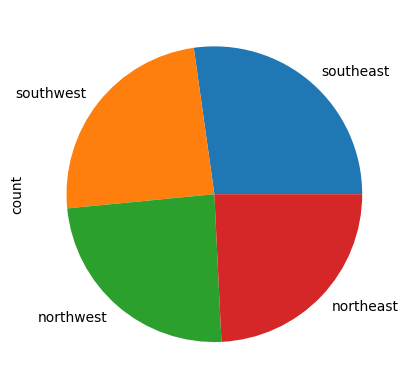

In [63]:
df.region.value_counts().plot(kind="pie")

<Axes: ylabel='count'>

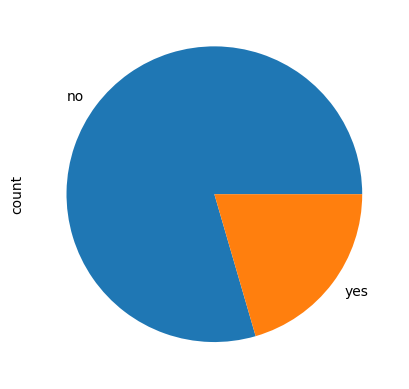

In [64]:
df.smoker.value_counts().plot(kind="pie")

## FIND THE MEAN MEDIAN COUNT

In [67]:
df.groupby("smoker").charges.agg(["mean","median","count"])

mean       median  count
smoker                                  
no       8440.660307   7345.72660   1063
yes     32050.231832  34456.34845    274

In [68]:
df.groupby("gender").charges.agg(["mean","median","count"])

mean     median  count
gender                                
female  12569.578844  9412.9625    662
male    13974.998864  9377.9047    675

In [69]:
df.groupby("smoker").age.mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

In [70]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

corr = df.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

ValueError: could not convert string to float: 'female'

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='bmi', ylabel='charges'>

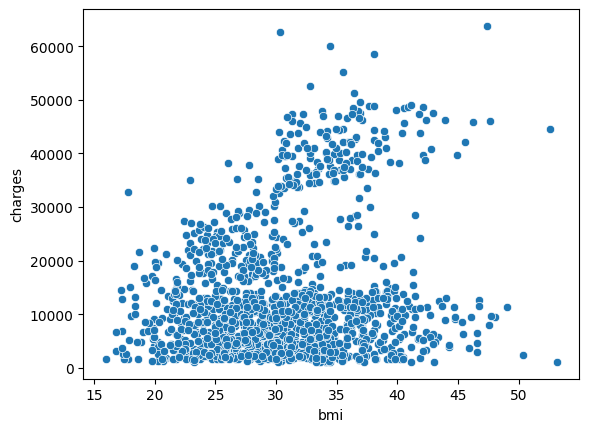

In [71]:
sns.scatterplot(x=df['bmi'], y=df['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

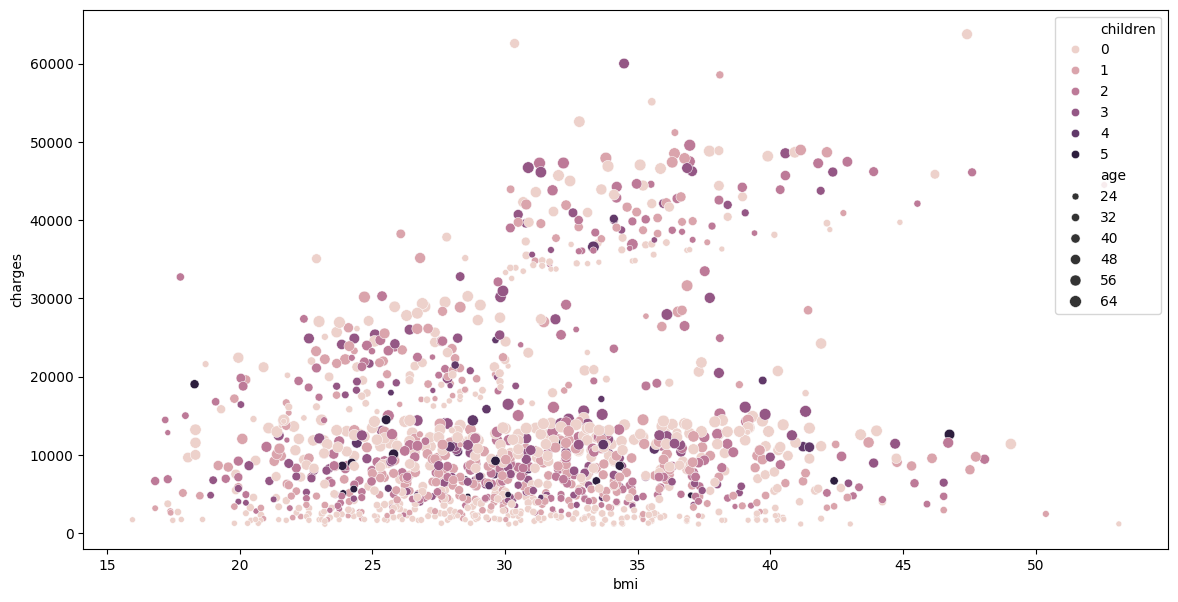

In [72]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['children'],size=df['age'])

<Axes: xlabel='age', ylabel='charges'>

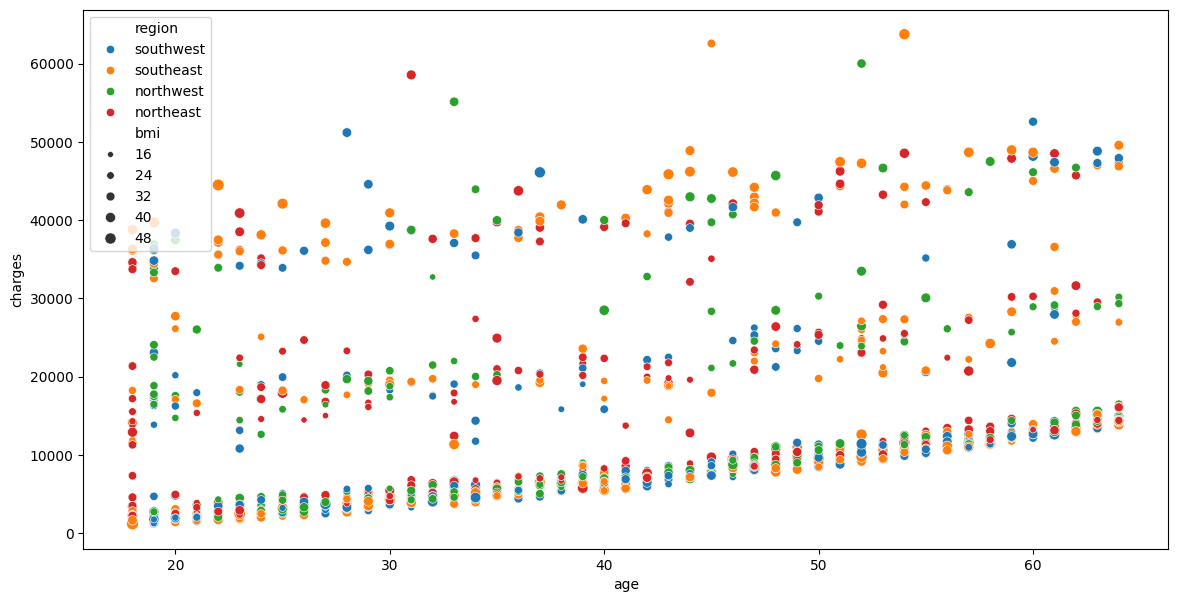

In [73]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['charges'],hue=df['region'],size=df['bmi'])

<Axes: xlabel='bmi', ylabel='charges'>

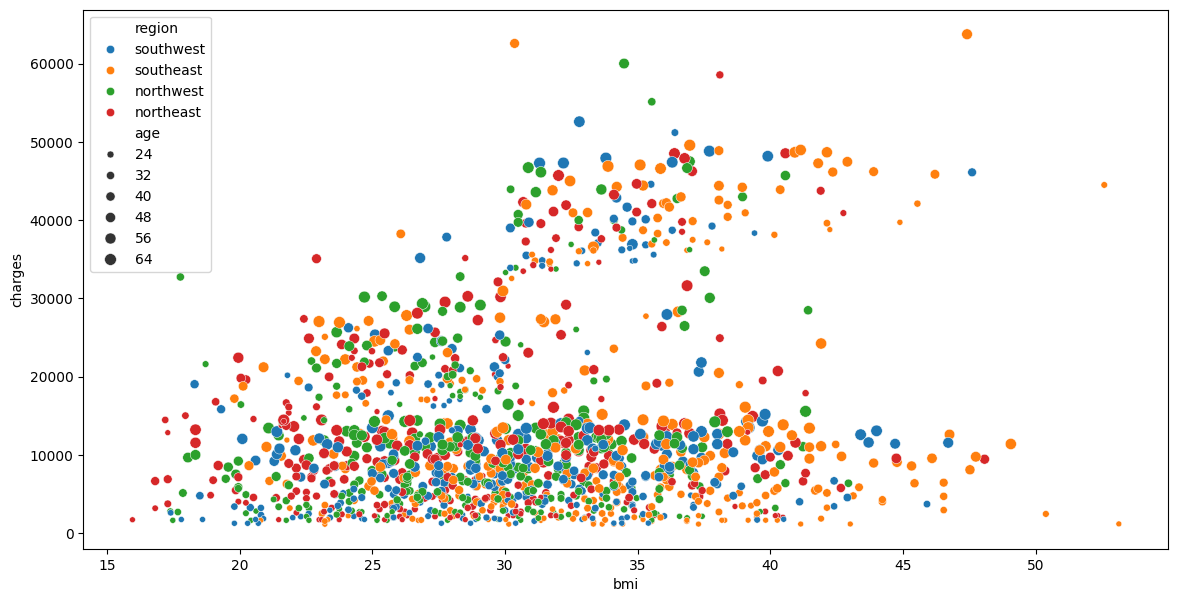

In [74]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['region'],size=df['age'])

<Axes: xlabel='age', ylabel='charges'>

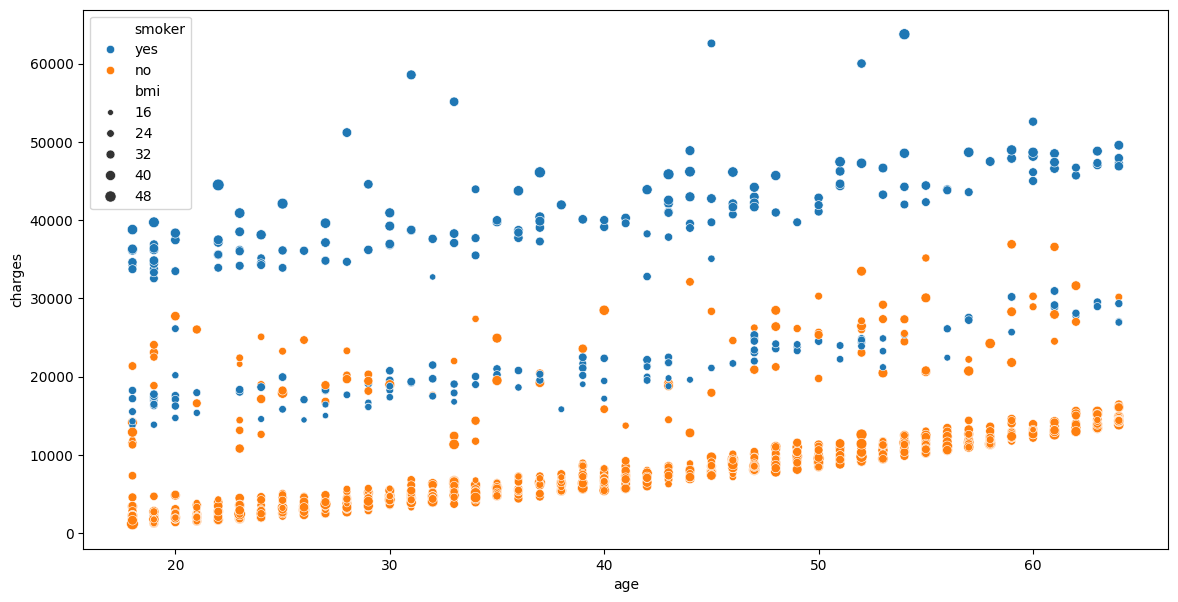

In [75]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['charges'],hue=df['smoker'],size=df['bmi'])

<Axes: xlabel='bmi', ylabel='charges'>

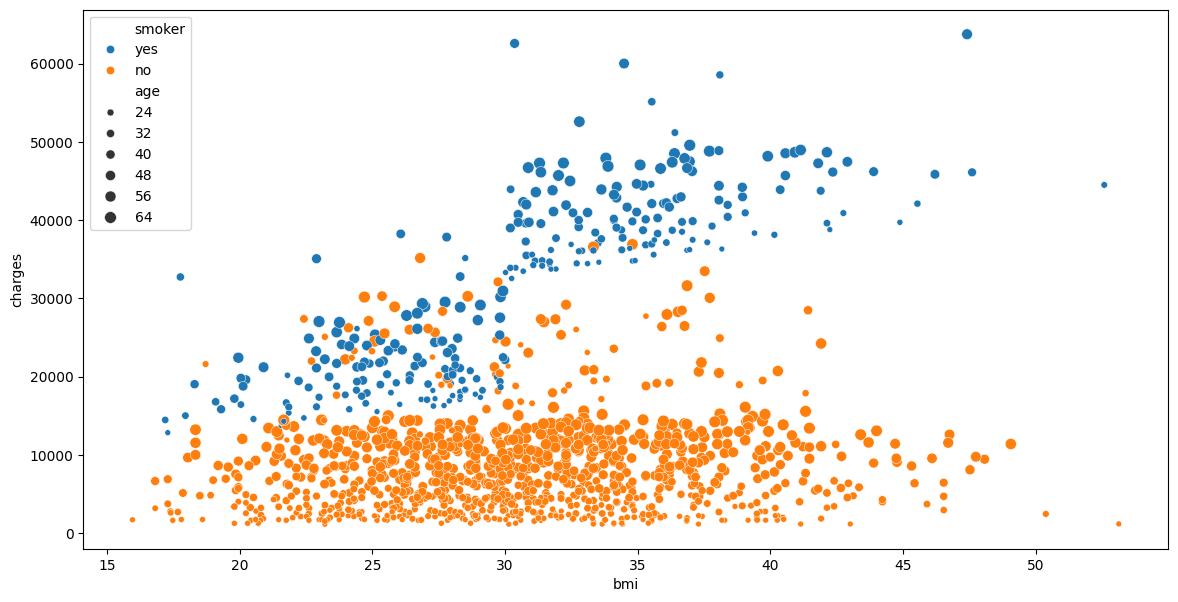

In [76]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['smoker'],size=df['age'])

<Axes: xlabel='bmi', ylabel='charges'>

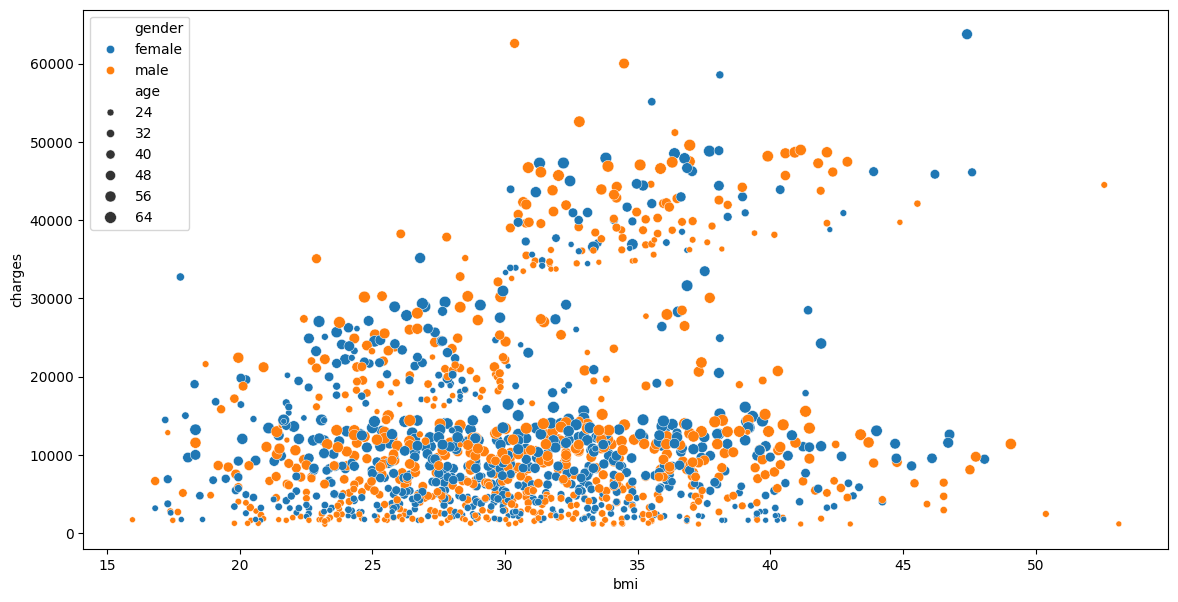

In [77]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['gender'],size=df['age'])

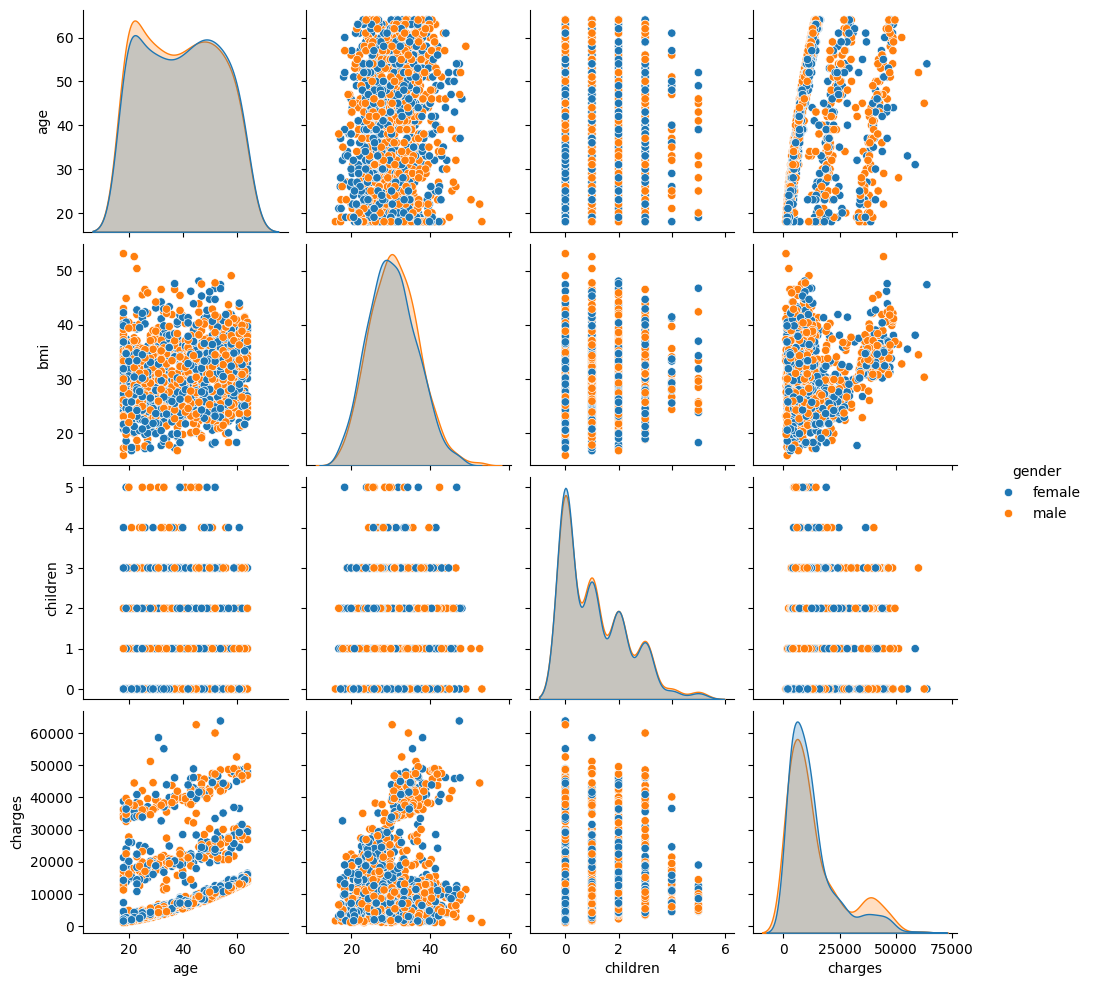

In [78]:
sns.pairplot(data=df,hue='gender')

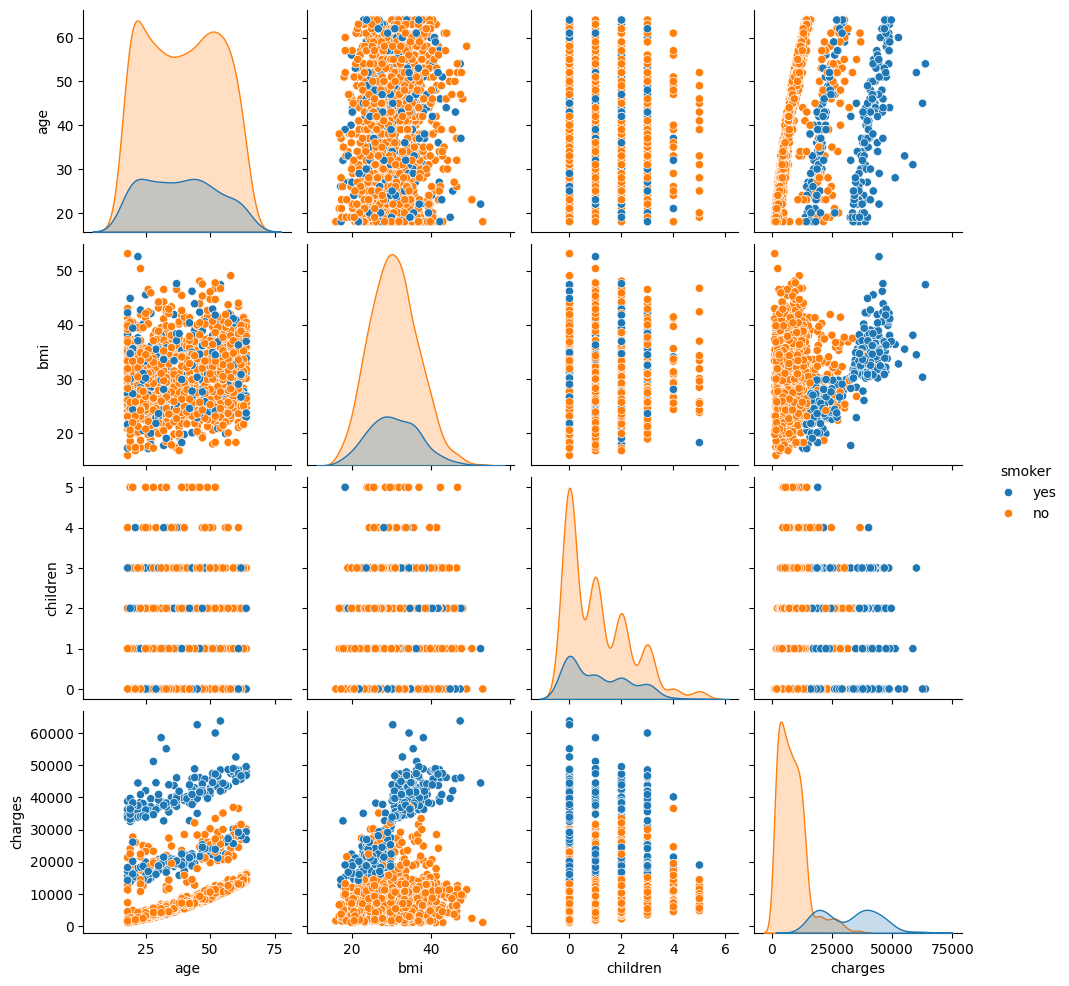

In [79]:
sns.pairplot(data=df,hue='smoker')

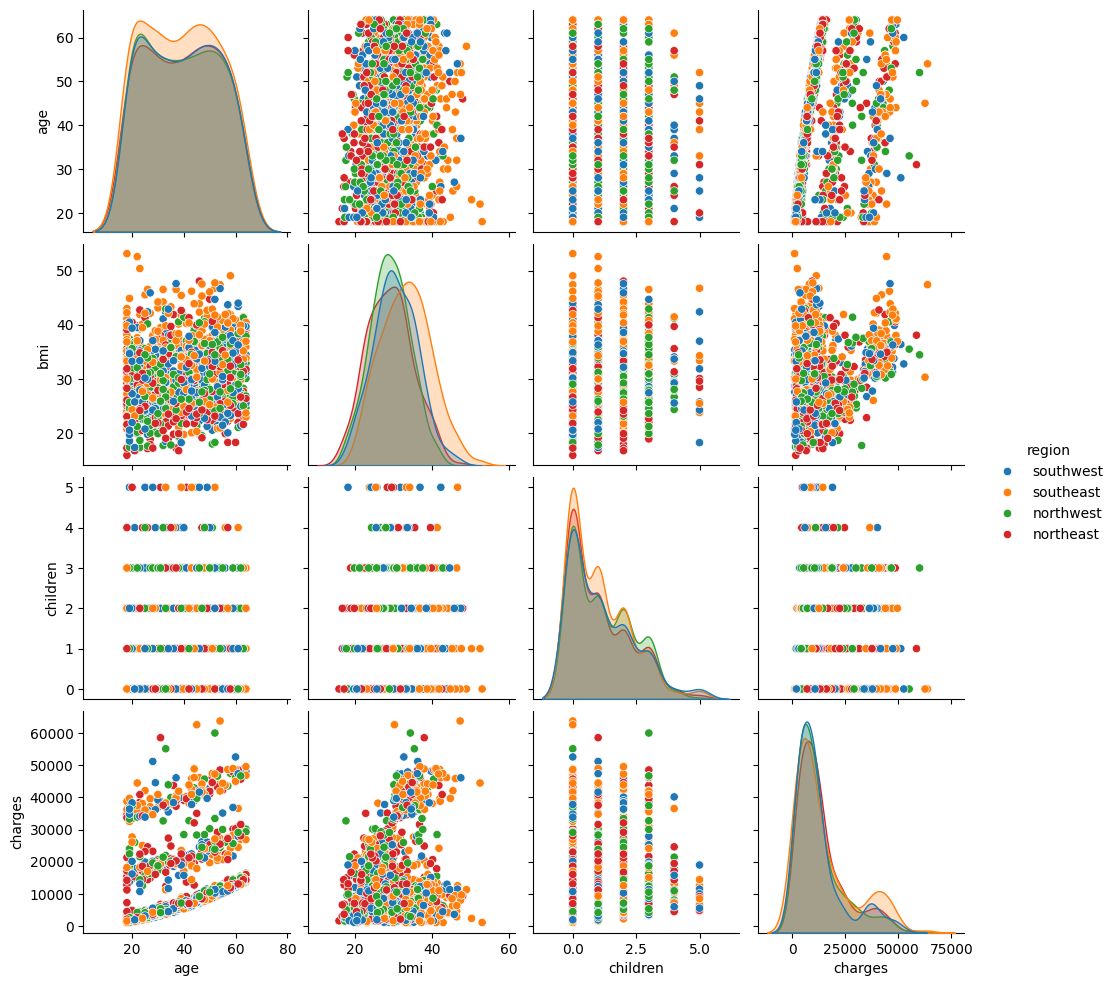

In [80]:
sns.pairplot(data=df,hue='region')

<Axes: xlabel='bmi', ylabel='charges'>

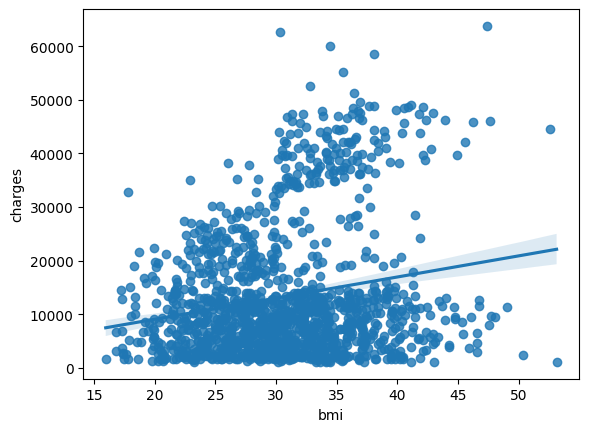

In [82]:
sns.regplot(x=df['bmi'], y=df['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

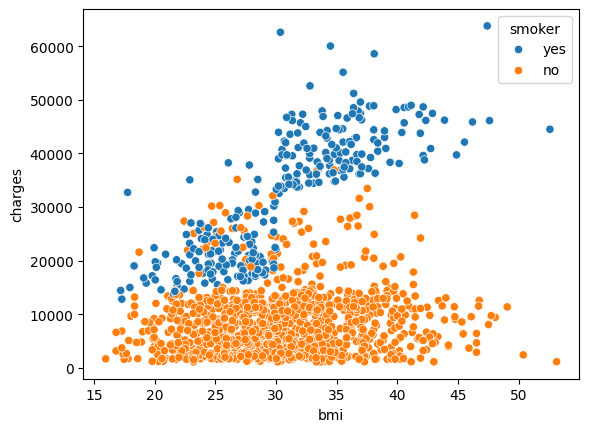

In [83]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

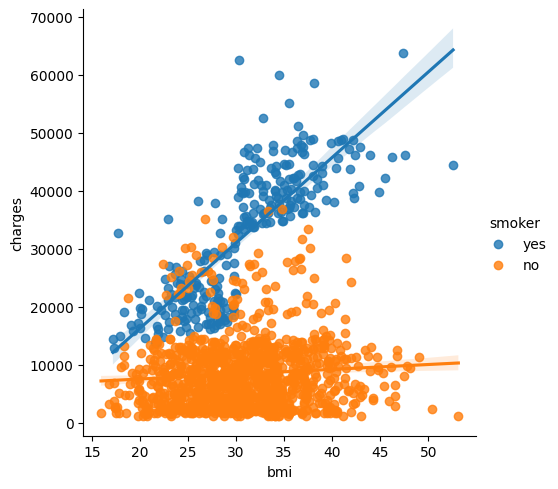

In [84]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


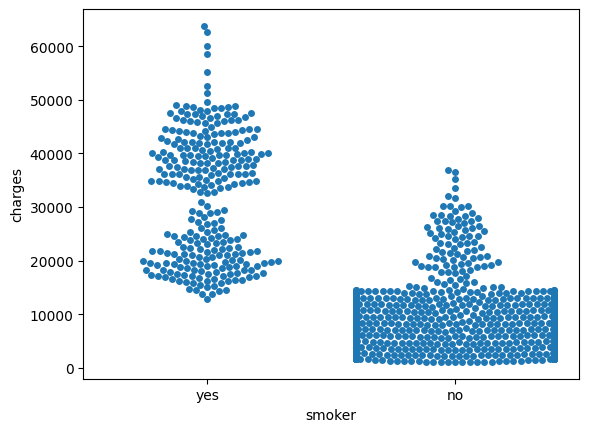

In [85]:
sns.swarmplot(x=df['smoker'],
              y=df['charges'])

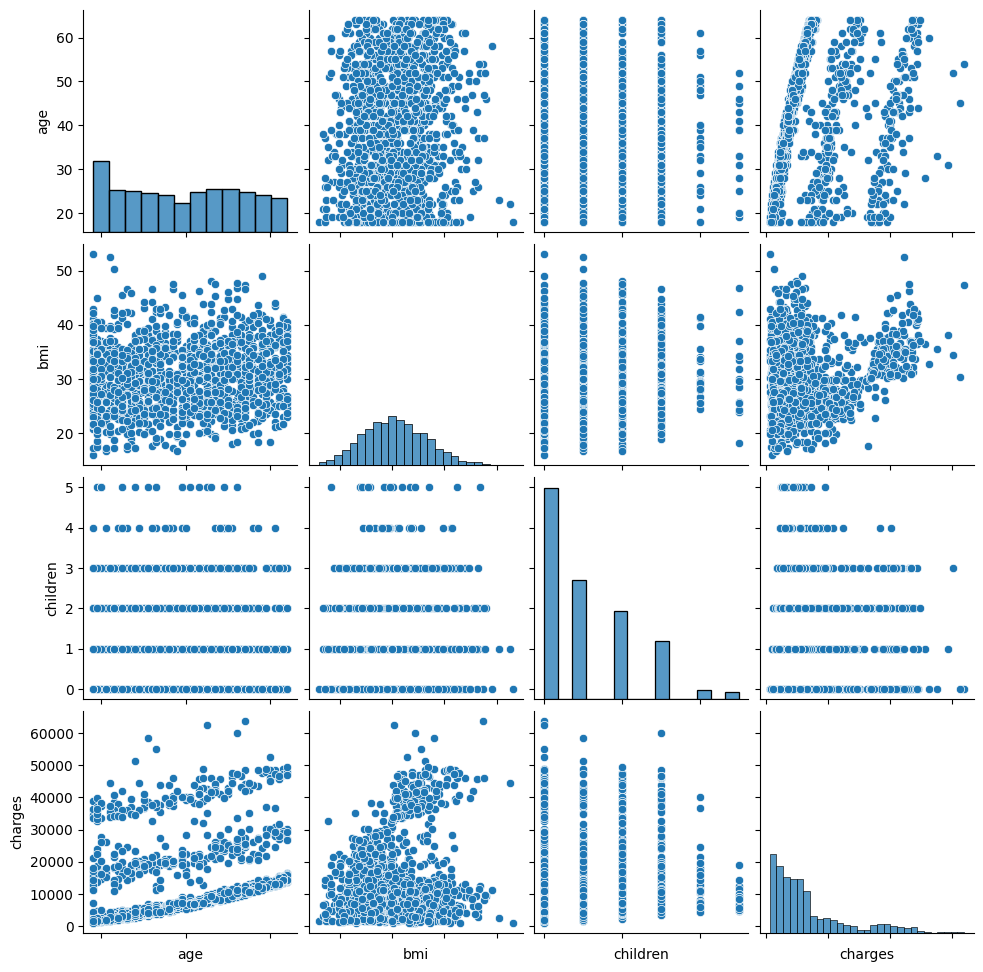

In [86]:
import seaborn as sns
g = sns.pairplot(df)
g.set(xticklabels=[])

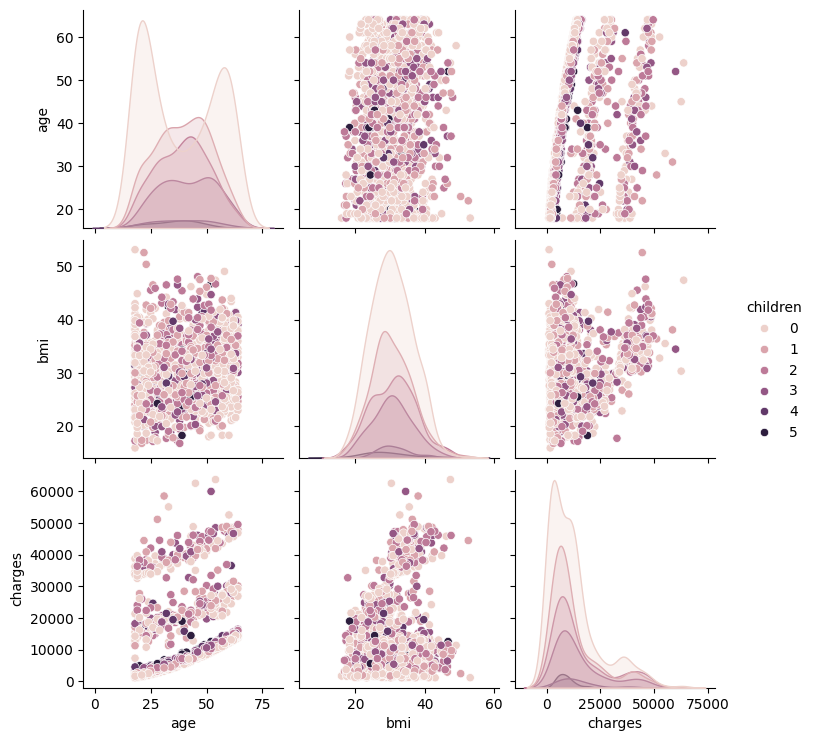

In [87]:
sns.pairplot(data=df,hue='children')

## MODEL CREATION

In [88]:
# Importing necessary package for creating model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [89]:
cat_col=['smoker','region','gender']
num_col=[i for i in df.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'charges']

## ONE-HOT  ENCODING

In [90]:
# one-hot encoding
one_hot=pd.get_dummies(df[cat_col])
insur_procsd_df=pd.concat([df[num_col],one_hot],axis=1)
insur_procsd_df.head(10)

age     bmi  children      charges  smoker_no  smoker_yes  \
0   19  27.900         0  16884.92400      False        True   
1   18  33.770         1   1725.55230       True       False   
2   28  33.000         3   4449.46200       True       False   
3   33  22.705         0  21984.47061       True       False   
4   32  28.880         0   3866.85520       True       False   
5   31  25.740         0   3756.62160       True       False   
6   46  33.440         1   8240.58960       True       False   
7   37  27.740         3   7281.50560       True       False   
8   37  29.830         2   6406.41070       True       False   
9   60  25.840         0  28923.13692       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0             False             False             False              True   
1             False             False              True             False   
2             False             False              True             False   
3             False              True             False             False   
4             False              True             False             False   
5             False             False              True             False   
6             False             False              True             False   
7             False              True             False             False   
8              True             False             False             False   
9             False              True             False             False   

   gender_female  gender_male  
0           True        False  
1          False         True  
2          False         True  
3          False         True  
4          False         True  
5           True        False  
6           True        False  
7           True        False  
8          False         True  
9           True        False

## LABEL ENCODING

In [91]:
#label encoding
insr_procsd_df_label=df
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_col:
    insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
insr_procsd_df_label.head(10)

<ipython-input-91-6ee22e9ecf80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
<ipython-input-91-6ee22e9ecf80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
<ipython-input-91-6ee22e9ecf80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

age  gender     bmi  children  smoker  region      charges
0   19       0  27.900         0       1       3  16884.92400
1   18       1  33.770         1       0       2   1725.55230
2   28       1  33.000         3       0       2   4449.46200
3   33       1  22.705         0       0       1  21984.47061
4   32       1  28.880         0       0       1   3866.85520
5   31       0  25.740         0       0       2   3756.62160
6   46       0  33.440         1       0       2   8240.58960
7   37       0  27.740         3       0       1   7281.50560
8   37       1  29.830         2       0       0   6406.41070
9   60       0  25.840         0       0       1  28923.13692

## USING ONE-HOT ENCODING

In [92]:
#using one hot encoding
X=insur_procsd_df.drop(columns='charges')
y=df[['charges']]

## TRAIN AND TEST EVALUATION

In [93]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1234)

In [94]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [95]:
# Print Model intercept and co-efficent
print("Model intercept",model.intercept_,"Model co-efficent",model.coef_)

Model intercept [3.14300534] Model co-efficent [[   254.82342321    331.37181027    509.45969453 -12293.93274403
   12293.93274403    689.81823835     42.78694146   -451.66873657
    -280.93644324    408.28053606   -408.28053606]]


In [96]:
cdf = pd.DataFrame(data=model.coef_.T, index=X.columns, columns=["Coefficients"])
cdf

Coefficients
age                 254.823423
bmi                 331.371810
children            509.459695
smoker_no        -12293.932744
smoker_yes        12293.932744
region_northeast    689.818238
region_northwest     42.786941
region_southeast   -451.668737
region_southwest   -280.936443
gender_female       408.280536
gender_male        -408.280536

## MEAN_SQUARED_ERROR,R2_SCORE

In [97]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("Predicting the train data")
train_predict = model.predict(train_X)
print("Predicting the test data")
test_predict = model.predict(test_X)
print("MAE")
print("Train : ",mean_absolute_error(train_y,train_predict))
print("Test  : ",mean_absolute_error(test_y,test_predict))
print("====================================")
print("MSE")
print("Train : ",mean_squared_error(train_y,train_predict))
print("Test  : ",mean_squared_error(test_y,test_predict))
print("====================================")
import numpy as np
print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(train_y,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(test_y,test_predict)))
print("====================================")
print("R^2")
print("Train : ",r2_score(train_y,train_predict))
print("Test  : ",r2_score(test_y,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((train_y - train_predict) / train_y)) * 100)
print("Test  : ",np.mean(np.abs((test_y - test_predict) / test_y)) * 100)

Predicting the train data
Predicting the test data
MAE
Train :  4134.47833419605
Test  :  4230.7975607575
MSE
Train :  37067187.73450865
Test  :  36067955.28156787
RMSE
Train :  6088.282823137297
Test  :  6005.660270242388
R^2
Train :  0.750857747585425
Test  :  0.7448411415187453
MAPE
Train :  41.672743313499915
Test  :  42.440373868471596


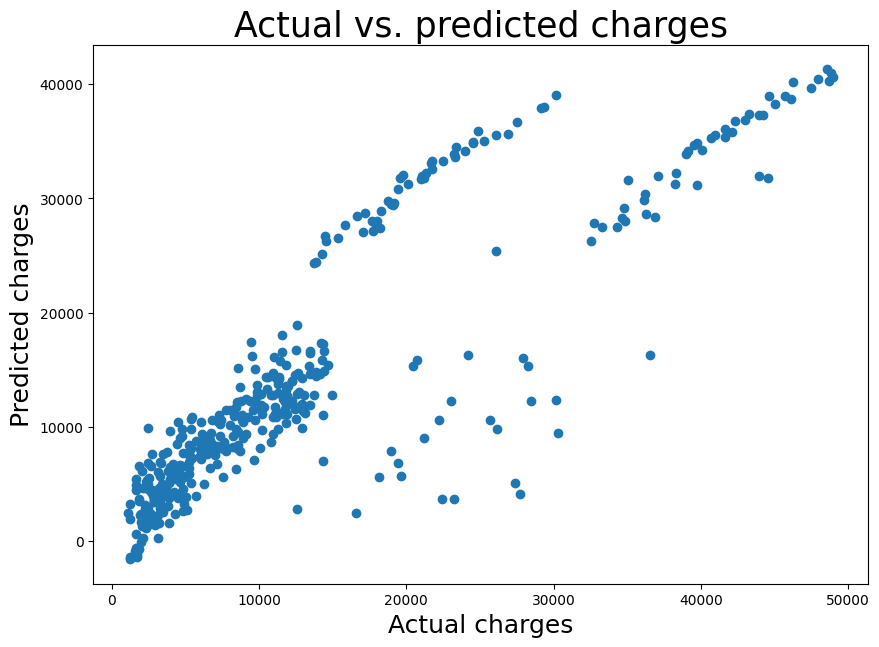

In [98]:
#Plot actual vs predicted value
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted charges",fontsize=25)
plt.xlabel("Actual charges",fontsize=18)
plt.ylabel("Predicted charges", fontsize=18)
plt.scatter(x=test_y,y=test_predict)

In [99]:
print("MAPE")
print("Train : ",np.mean(np.abs((train_y - train_predict) / train_y)) * 100)
print("Test  : ",np.mean(np.abs((test_y - test_predict) / test_y)) * 100)

MAPE
Train :  41.672743313499915
Test  :  42.440373868471596
